In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pgmpy.models import BayesianModel
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split

C:\Users\natty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Leer el archivo CSV

df = pd.read_csv("datos_p3.csv")
print(df.columns)


Index(['PERIODO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE',
       'COLE_DEPTO_UBICACION', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION',
       'ESTU_GENERO', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'PUNT_GLOBAL'],
      dtype='object')


In [4]:
#Tenemos que discretizar periodo y puntaje global
#Discretizar cole area ubicacion
df["COLE_AREA_UBICACION_DISCRETO"] = df["COLE_AREA_UBICACION"]
df['COLE_AREA_UBICACION'] = pd.factorize(df['COLE_AREA_UBICACION_DISCRETO'])[0]

#Discretizar cole bilingue
df["COLE_BILINGUE_DISCRETO"] = df["COLE_BILINGUE"]
df['COLE_BILINGUE'] = pd.factorize(df['COLE_BILINGUE_DISCRETO'])[0]

#Discretizar COLE_DEPTO_UBICACION
df["COLE_DEPTO_UBICACION_DISCRETO"] = df["COLE_DEPTO_UBICACION"]
df['COLE_DEPTO_UBICACION'] = pd.factorize(df['COLE_DEPTO_UBICACION_DISCRETO'])[0]

#Discretizar COLE_JORNADA
df["COLE_JORNADA_DISCRETO"] = df["COLE_JORNADA"]
df['COLE_JORNADA'] = pd.factorize(df['COLE_JORNADA_DISCRETO'])[0]

#Discretizar COLE_MCPIO_UBICACION
df["COLE_MCPIO_UBICACION_DISCRETO"] = df["COLE_MCPIO_UBICACION"]
df['COLE_MCPIO_UBICACION'] = pd.factorize(df['COLE_MCPIO_UBICACION_DISCRETO'])[0]

#Discretizar FAMI_EDUCACIONMADRE
df["FAMI_EDUCACIONMADRE_DISCRETO"] = df["FAMI_EDUCACIONMADRE"]
df['FAMI_EDUCACIONMADRE'] = pd.factorize(df['FAMI_EDUCACIONMADRE_DISCRETO'])[0]

#Discretizar FAMI_EDUCACIONPADRE
df["FAMI_EDUCACIONPADRE_DISCRETO"] = df["FAMI_EDUCACIONPADRE"]
df['FAMI_EDUCACIONPADRE'] = pd.factorize(df['FAMI_EDUCACIONPADRE_DISCRETO'])[0]

#Discretizar FAMI_ESTRATOVIVIENDA
df["FAMI_ESTRATOVIVIENDA_DISCRETO"] = df["FAMI_ESTRATOVIVIENDA"]
df['FAMI_ESTRATOVIVIENDA'] = pd.factorize(df['FAMI_ESTRATOVIVIENDA_DISCRETO'])[0]

#Discretizar FAMI_TIENEINTERNET
df["FAMI_TIENEINTERNET_DISCRETO"] = df["FAMI_TIENEINTERNET"]
df['FAMI_TIENEINTERNET'] = pd.factorize(df['FAMI_TIENEINTERNET_DISCRETO'])[0]

#Discretizar puntaje global

df["PUNT_GLOBAL_DISCRETO"] = df["PUNT_GLOBAL"]

df.loc[df["PUNT_GLOBAL_DISCRETO"] < 100, "PUNT_GLOBAL" ] = 1
df.loc[(100 <= df["PUNT_GLOBAL_DISCRETO"]) & (df["PUNT_GLOBAL_DISCRETO"] < 200), "PUNT_GLOBAL" ] = 2
df.loc[(200 <= df["PUNT_GLOBAL_DISCRETO"]) & (df["PUNT_GLOBAL_DISCRETO"] < 300), "PUNT_GLOBAL" ] = 3
df.loc[(300 <= df["PUNT_GLOBAL_DISCRETO"]) & (df["PUNT_GLOBAL_DISCRETO"] < 400), "PUNT_GLOBAL" ] = 4
df.loc[(400 <= df["PUNT_GLOBAL_DISCRETO"]) & (df["PUNT_GLOBAL_DISCRETO"] < 500), "PUNT_GLOBAL" ] = 5
df.PUNT_GLOBAL = df.PUNT_GLOBAL.astype(int)
#No lo toma como numero

#Discretizar periodo
df["PERIODO_DISCRETO"] = df["PERIODO"]

df.loc[(df["PERIODO_DISCRETO"] == 20191), "PERIODO"] = 1
df.loc[(df["PERIODO_DISCRETO"] == 20194), "PERIODO"] = 4
df.PERIODO = df.PERIODO.astype(int)

#Eliminamos columnas sobrantes
df.drop(["PERIODO_DISCRETO", "PUNT_GLOBAL_DISCRETO","COLE_AREA_UBICACION_DISCRETO","COLE_BILINGUE_DISCRETO",
         "COLE_DEPTO_UBICACION_DISCRETO","COLE_JORNADA_DISCRETO","COLE_MCPIO_UBICACION_DISCRETO",
         "FAMI_EDUCACIONMADRE_DISCRETO","FAMI_EDUCACIONPADRE_DISCRETO","FAMI_ESTRATOVIVIENDA_DISCRETO","FAMI_TIENEINTERNET_DISCRETO"], axis=1, inplace=True)
df

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_DEPTO_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_GENERO,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,PUNT_GLOBAL
0,4,0,0,0,0,0,M,0,0,0,0,3
1,4,0,0,1,0,1,F,1,1,0,0,4
2,4,0,0,1,0,1,F,1,1,0,0,4
3,4,0,0,2,1,2,M,2,2,0,1,3
4,4,0,0,2,1,2,M,2,2,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
869317,4,0,0,9,3,490,F,6,9,1,0,3
869318,4,0,0,19,3,629,M,0,8,0,0,3
869319,4,0,0,19,3,629,M,0,8,0,0,3
869320,4,1,0,17,3,383,M,3,9,1,0,3


In [5]:
#Test
variables = [column for column in df.columns if column != 'PUNT_GLOBAL']
X = df[variables].values
y = df['PUNT_GLOBAL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
df_train = pd.DataFrame(X_train, columns=variables)
df_train['PUNT_GLOBAL'] = y_train

df_test = pd.DataFrame(X_test, columns=variables)
df_test['PUNT_GLOBAL'] = y_test

In [6]:
def trainModel(df_train):
    model = BayesianNetwork(
    [ ("FAMI_TIENEINTERNET", "PUNT_GLOBAL"),
     ("COLE_BILINGUE", "PUNT_GLOBAL"),
     ("FAMI_ESTRATOVIVIENDA", "FAMI_TIENEINTERNET"),
     ("PERIODO", "COLE_BILINGUE"),
     ("COLE_JORNADA", "COLE_BILINGUE"),
     ("FAMI_EDUCACIONMADRE", "FAMI_ESTRATOVIVIENDA"),
     ("FAMI_EDUCACIONPADRE", "FAMI_ESTRATOVIVIENDA"),
     ("COLE_MCPIO_UBICACION", "COLE_BILINGUE"),     
     ("COLE_DEPTO_UBICACION", "COLE_MCPIO_UBICACION"),
     ("COLE_AREA_UBICACION", "COLE_DEPTO_UBICACION"),
     ("COLE_AREA_UBICACION", "FAMI_ESTRATOVIVIENDA"),
     ("FAMI_ESTRATOVIVIENDA", "COLE_BILINGUE")])
    model.fit (
        data=df_train,
        estimator=MaximumLikelihoodEstimator
    )
    model.check_model()
    
    return model

In [7]:
def getEvidence(nodes, row):
    
    evidence = {}
    for node in nodes:
        if node != 'PUNT_GLOBAL':
            evidence[node] = (row[node])
    
    return evidence

In [8]:
def inferenceEvidence(evidence, infer):
    
    prob = infer.query(variables=['PUNT_GLOBAL'], evidence=evidence)
    
    return prob.values.tolist()

In [9]:
def getClassification(probs):
    maxi = 0
    clase = 0
    for i in range(0, 5):
        if probs[i] > maxi:
            maxi = probs[i]
            clase = i+1
    
    return clase

In [10]:
model = trainModel(df_train)
print(model)

BayesianNetwork with 11 nodes and 12 edges


In [11]:
nodes = model.nodes

infer = VariableElimination(model)

test = []
for i in range(0, len(df_test)):
    row = df_test.iloc[i]
    evidence = getEvidence(nodes=nodes, row=row)
    probs = inferenceEvidence(evidence, infer)
    classification = getClassification(probs)
    test.append(classification)    

df_test['test'] = test

C:\Users\natty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:478: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()


In [12]:
df_test

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_DEPTO_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_GENERO,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,PUNT_GLOBAL,test
0,4,0,0,14,0,107,F,0,2,6,1,2,3
1,4,0,0,19,3,47,F,1,10,0,1,3,3
2,4,0,0,19,0,91,F,1,7,0,1,3,3
3,4,0,0,10,2,30,F,6,10,2,1,4,3
4,4,0,0,12,0,324,M,5,4,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217326,4,1,0,14,0,879,F,5,9,6,0,3,3
217327,4,0,0,6,0,7,F,3,4,1,0,2,3
217328,4,0,0,6,0,7,F,0,9,0,0,3,3
217329,4,0,0,6,3,7,M,1,2,2,1,3,3


In [13]:
prueba = df_test[['PUNT_GLOBAL', 'test']]
conteo_filas = (prueba['PUNT_GLOBAL'] == prueba['test']).sum()
print(conteo_filas/prueba.shape[0])


0.6396096277107269


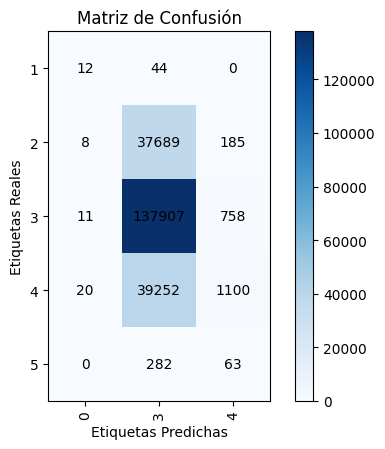

In [14]:
prueba = pd.crosstab(df_test['PUNT_GLOBAL'], df_test['test'])

# Crear la visualización de la matriz de confusión
plt.imshow(prueba, cmap='Blues')
plt.colorbar()

# Configurar etiquetas de los ejes
plt.xticks(range(len(prueba.columns)), prueba.columns, rotation=90)
plt.yticks(range(len(prueba.index)), prueba.index)

# Añadir los valores de la matriz como texto en cada celda
for i in range(len(prueba.index)):
    for j in range(len(prueba.columns)):
        plt.text(j, i, prueba.iloc[i, j], ha='center', va='center')

# Mostrar la matriz de confusión
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')
plt.show()

In [23]:
# Obtener las etiquetas únicas de las clases
clases = prueba.columns.tolist()

for clase in clases:
    TP = prueba.loc[clase, clase]
    FP = prueba.loc[:, clase].sum() - TP
    FN = prueba.loc[clase, :].sum() - TP

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f"Clase {clase}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}")


KeyError: 0